In [2]:
import cv2
import matplotlib.pyplot as plt
# 이미지 불러오기
image = cv2.imread(r"C:\Users\praye\Documents\Bootcamp\energy_1\raw data\test_image.jpg")


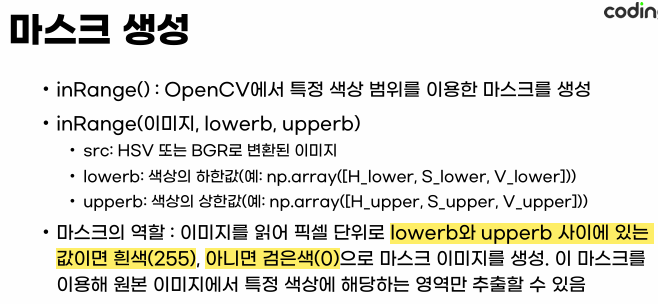

In [2]:
# 컬러 변환 : BGR -> HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
import numpy as np
# 색상 범위 설정 ㅡ 빨간색
lower = np.array([0, 120, 70])
upper = np.array([10, 255, 255])
# 색상 범위 값은 검색하여 찾아야 함
# 마스크 생성
mask_ = cv2.inRange(hsv_image, lower, upper)

# 원본 + 마스크 적용
result = cv2.bitwise_and(image, image, mask=mask_)      # 두 이미지간의 비트 연산
# 앞의 매개변수 2개는 같은 채널수를 갖는 이미지를 인수로 넘겨줌

(np.float64(-0.5), np.float64(399.5), np.float64(399.5), np.float64(-0.5))

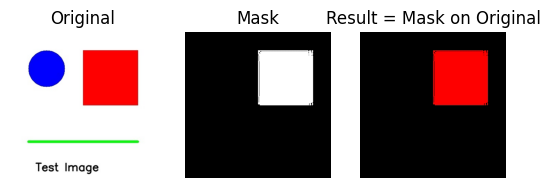

In [6]:
plt.subplot(1,3,1)
plt.title("Original")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1,3,2)
plt.title("Mask")
plt.imshow(mask_, cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title("Result = Mask on Original")
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.axis('off')



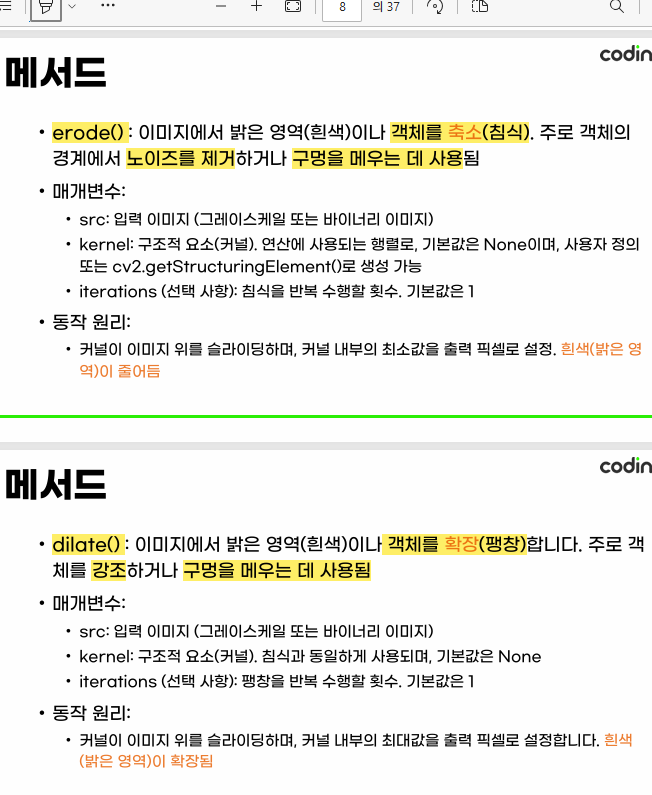

In [1]:
# 웹캠 이용한 실시간 객체 추적
import cv2
import numpy as np

# 웹캠 초기화
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("웹캠을 열 수 없습니다.")
    exit()

while True:
    ret, frame = cap.read()
    if not ret :
        break

    frame = cv2.resize(frame, (640, 480))           # 웹캠 화면 크기 변경

    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)    # 색 변경 : BGR -> HSV

    lower = np.array([0, 20, 70])                   # 피부색 범위 설정 (HSV)
    upper = np.array([20, 255, 255])                # 피부색 범위 설정 (HSV)

    mask = cv2.inRange(hsv, lower, upper)           # 마스크 설정

    # 노이즈 제거 (모폴로지 연산)
    mask = cv2.erode(mask, None, iterations=3)
    mask = cv2.dilate(mask, None, iterations=3)

    # 컨투어 찾기
    contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # 윤곽선 그리기
    for con in contours :
        area = cv2.contourArea(con)
        cv2.drawContours(frame, [con], -1, (0, 255, 0), 2)

    cv2.imshow("Skin", frame)
    cv2.imshow("Mask", mask)

    if cv2.waitKey(1) == ord('q'):
        break


cap.release()
cv2.destroyAllWindows()





AttributeError: 'cv2.VideoCapture' object has no attribute 'realease'

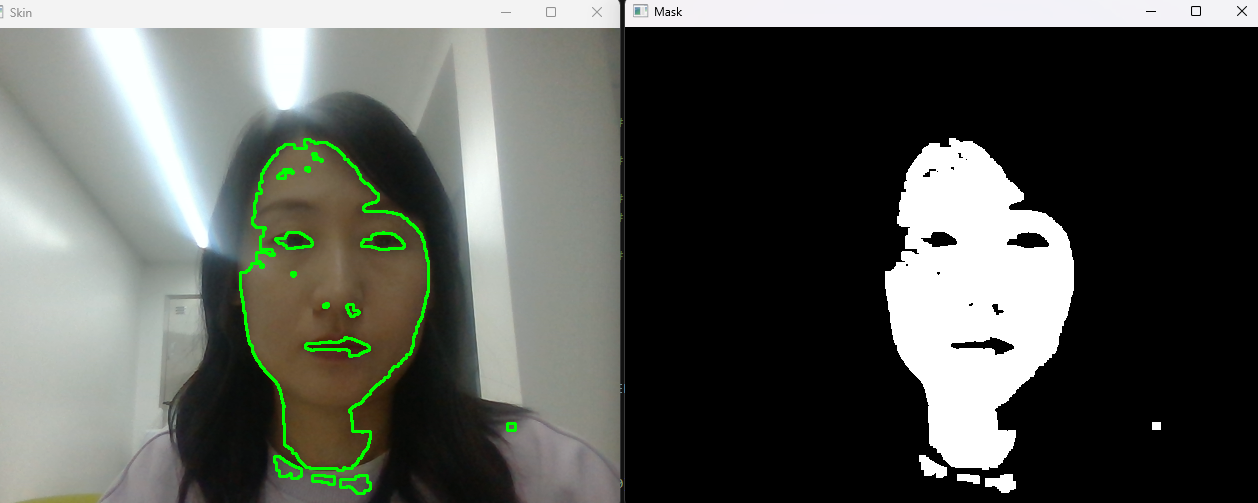

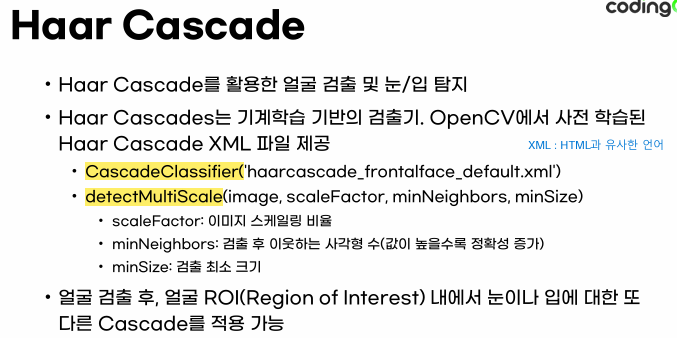

In [1]:
import cv2

# Haar Cascade 불러오기
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# 웹캠 열기기
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("웹캠을 열 수 없습니다.")
    exit()

while True:
    ret, frame = cap.read()
    if not ret :
        break

    # 1) gray 스케일로 변환
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # 2) 얼굴 탐지
    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5, minSize=(30,30))
    # 매개변수별 값 튜닝이 시간이 걸리는 부분임임


    # 3) 탐지된 얼굴에 사각형 그리기 ㅡ .rectangle(이미지, (시작좌표), (가로, 세로), (색상), 라인두께)
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

    cv2.imshow('face', frame)

    if cv2.waitKey(1) == ord('q'):
        break


cap.release()
cv2.destroyAllWindows()



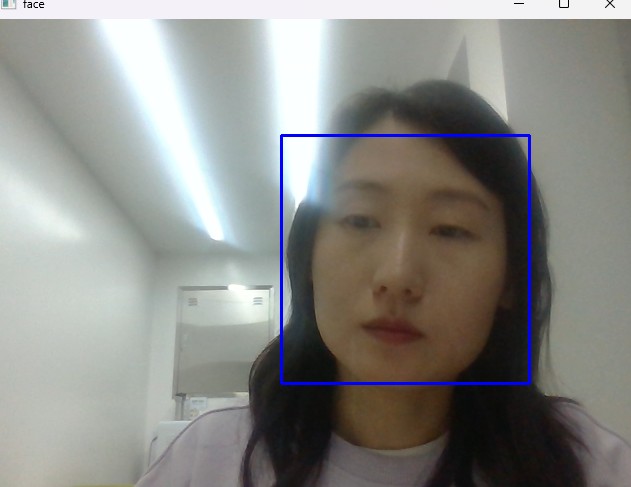

# 얼굴 & 눈 인식

In [7]:
import cv2

# 얼굴
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
# 눈
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# 웹캠 열기기
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("웹캠을 열 수 없습니다.")
    exit()

while True:
    ret, frame = cap.read()
    if not ret :
        break

    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5, minSize=(30,30))

    # 3) 탐지된 얼굴에 사각형 그리기 ㅡ .rectangle(이미지, (시작좌표), (가로, 세로), (색상), 라인두께)
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

        # 눈 탐지
        eyes = eye_cascade.detectMultiScale(faces, scaleFactor=1.1, minNeighbors=10, minSize=(15,15))

        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(frame, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)

    cv2.imshow('eyes', frame)

    if cv2.waitKey(1) == ord('q'):
        break


cap.release()
cv2.destroyAllWindows()







error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\objdetect\src\cascadedetect.cpp:1389: error: (-215:Assertion failed) scaleFactor > 1 && _image.depth() == CV_8U in function 'cv::CascadeClassifierImpl::detectMultiScale'


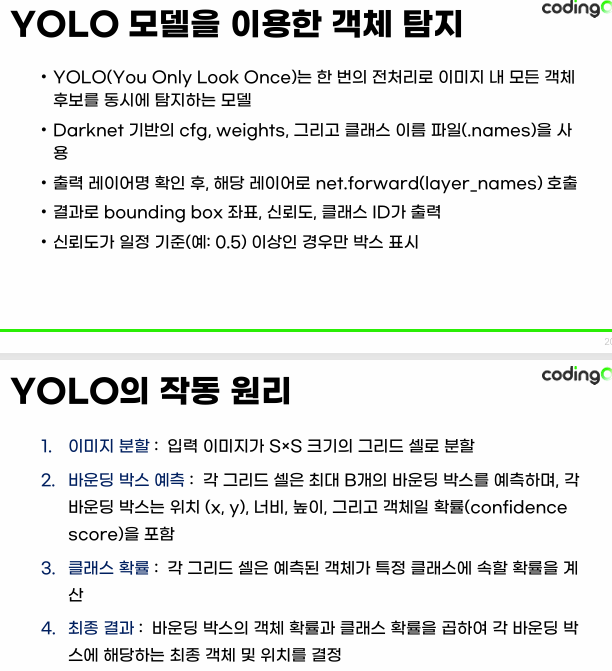

In [ ]:
from ultralytics import YOLO
import cv2

# YOLO 모델 인스턴스 생성
model = YOLO('yolov8n.pt')
# 이미지 불러오기
image = cv2.imread(r"C:\Users\praye\Documents\Bootcamp\energy_1\raw data\test_yolo.jpg")

# 모델을 이용한 객체 탐지
results = model.predict(source=image, save=False, save_txt=False, conf=0.5)
# conf : 신뢰도

# 결과 시각화
frame = results[0].plot()       # .plot() : 탐지된 객체를 시각화한 이미지로 반환

cv2.imshow("YOLO", frame)
cv2.waitKey(0)
cv2.destroyAllWindows()




0: 640x640 11 persons, 13 cars, 1 bus, 4 traffic lights, 1 backpack, 210.4ms
Speed: 10.0ms preprocess, 210.4ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)


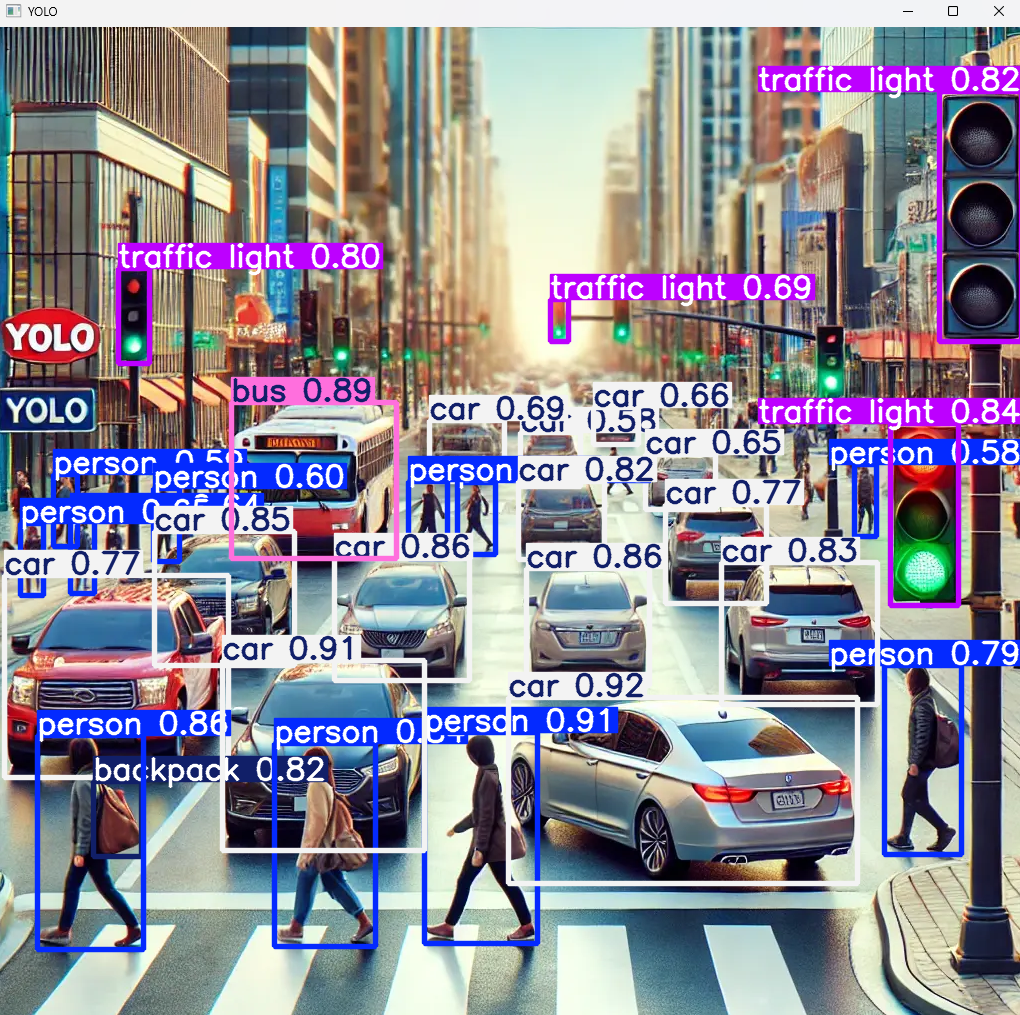

# 실습. HSV 연습문제
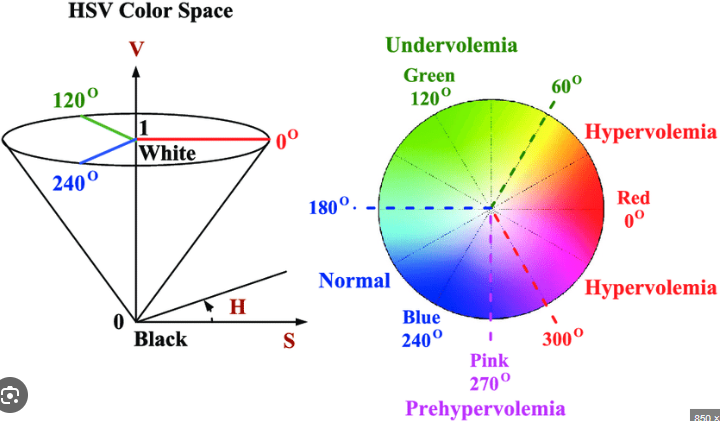

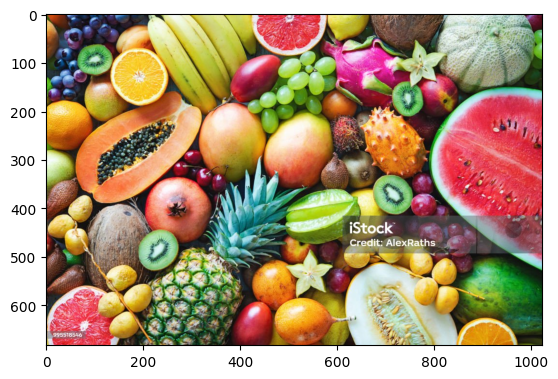

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# 이미지 불러오기
image = cv2.imread(r"C:\Users\praye\Documents\Bootcamp\energy_1\raw data\colorful_fruits.jpg" )
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

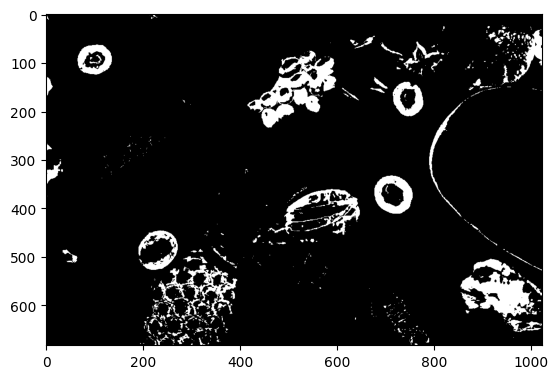

In [8]:

# 컬러 변환 : BGR -> HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
# 색상 범위 설정 ㅡ 녹색
lower = np.array([40, 60, 80])
upper = np.array([65, 255, 255])

# 마스크 생성
mask_ = cv2.inRange(hsv_image, lower, upper)

# 원본 + 마스크 적용
result = cv2.bitwise_and(image, image, mask=mask_)
plt.imshow(mask_, cmap='gray')

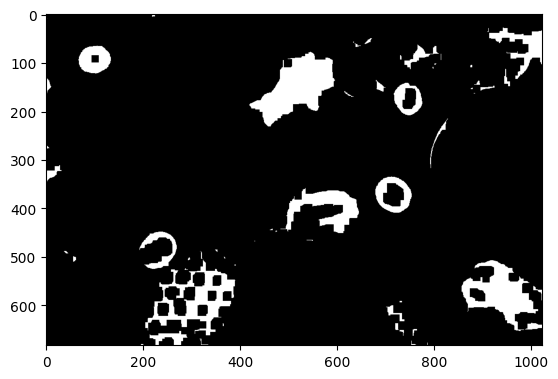

In [9]:
# 노이즈 제거 (모폴로지 연산)
mask_ = cv2.dilate(mask_, None, iterations=5)
mask_ = cv2.erode(mask_, None, iterations=7)
plt.imshow(mask_, cmap='gray')

검출된 초록색 물체 개수 :  68


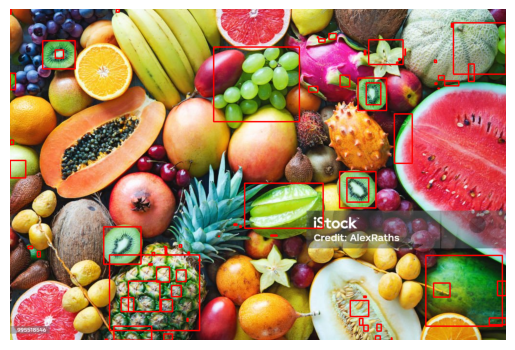

In [10]:
# 컨투어 찾기
contours, _ = cv2.findContours(mask_, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# 윤곽선 그리기
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(image, 
                pt1=(x,y), pt2=(x+w, y+h), 
                color=(0, 0, 255), thickness=2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
print("검출된 초록색 물체 개수 : ", len(contours))

검출된 초록색 물체 개수 :  25


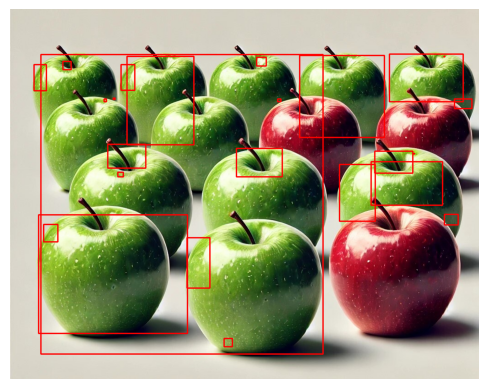

In [90]:
# 코드 통합본
import cv2
import matplotlib.pyplot as plt
import numpy as np

# 이미지 불러오기
image = cv2.imread(r"C:\Users\praye\Documents\Bootcamp\energy_1\raw data\apple.jpg" )

# 컬러 변환 : BGR -> HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# 색상 범위 설정 ㅡ 녹색
lower = np.array([40, 80, 80])
upper = np.array([65, 255, 255])

# 마스크 생성
mask_ = cv2.inRange(hsv_image, lower, upper)

# 노이즈 제거 (모폴로지 연산)
mask_ = cv2.dilate(mask_, None, iterations=5)
mask_ = cv2.erode(mask_, None, iterations=7)

# 컨투어 찾기
contours, _ = cv2.findContours(mask_, cv2.RETR_TREE, 
                               cv2.CHAIN_APPROX_SIMPLE)

# 윤곽선 그리기
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(image, 
                pt1=(x,y), pt2=(x+w, y+h), 
                color=(0, 0, 255), thickness=2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

print("검출된 초록색 물체 개수 : ", len(contours))

In [101]:
!pip install numpy --upgrade

검출된 초록색은 : 18개


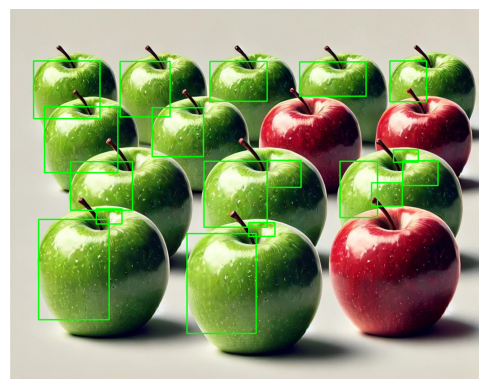

In [103]:
# 실습 ㅡ 리더님 코드
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread(r"C:\Users\praye\Documents\Bootcamp\energy_1\raw data\apple.jpg")

hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

lower = np.array([35, 150, 150])
upper = np.array([85, 255, 255])

mask = cv2.inRange(hsv, lower, upper)

contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

count = 0
for con in contours:
    area = cv2.contourArea(con)

    if area > 500 : # 작은 노이즈 제거
        count += 1
        x, y, w, h = cv2.boundingRect(con)      # 객체를 감싸는 가장 작은 축에 정렬된 사각형
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

print(f"검출된 초록색은 : {count}개")
# cv2.imshow("Detecting Green", image)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
cv2.waitKey(0)
cv2.destroyAllWindows()

        
